<a href="https://colab.research.google.com/github/arpitmehta22/Hindi-postagging-tl-domainadaptation/blob/main/Hindi_postagging_tl_domainadaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import bs4 
import keras
from keras.models import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,GRU,Dense,Conv2D,MaxPool2D,Input,Dropout,Activation,Bidirectional,Concatenate,Lambda,Reshape,Conv1D,MaxPooling1D
from keras.utils import to_categorical
import keras.backend as K
import numpy as np


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:

# !pip install tensorflow==2.2

In [ ]:
!pip install keras==2.2.4        
      

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git



  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-vdk_h2hf
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-vdk_h2hf
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=6d772aa3b213edb1585637b7870700cefc358330e4db3e4c0203ba81121afa43
  Stored in directory: /tmp/pip-ephem-wheel-cache-1pg57fj9/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
!pip install tensorflow==1.14.0

In [ ]:

disease_f = os.listdir('/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data')
tourism_f = os.listdir('/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Tourism/Data')


**?**

In [ ]:
print(disease_f)
print(tourism_f)

['mor-डेंगू-pos-chunk-151-200-posn-name', 'mor-तपेदिक-pos-chunk-401-422-posn-name', 'mor-मलेरिया-151-204-posn-name', 'mor-मलेरिया-101-150-posn-name', 'mor-इनफ्लुएंजा-pos-chunk-51-69-posn-name', 'mor-पोलियो-pos-chunk-51-102-posn-name', 'mor-पोलियो-pos-chunk-1-50-posn-name', 'mor-निमोनिया-pos-chunk-151-200-posn-name', 'now', 'mor-निमोनिया-pos-chunk-51-100-posn-name', 'mor-तपेदिक-pos-chunk-151-200-posn-name', 'now1', 'mor-ऑस्टियोपोरोसिस-pos-chunk-101-150-posn-name', 'mor-डेंगू-pos-chunk-51-100-posn-name', 'mor-तपेदिक-pos-chunk-351-400-posn-name', 'mor-खसरा-pos-chunk-101-124-posn-name', 'mor-पार्किंसन-pos-chunk-51-74-posn-name', 'mor-डेंगू-pos-chunk-201-250-posn-name', 'mor-धूम्रपान-pos-chunk-101-150-posn-name', 'mor-मलेरिया-1-50-posn-name', 'mor-डेंगू-pos-chunk-1-50-posn-name', 'mor-डिप्थीरिया-pos-chunk-51-72-posn-name', 'mor-तपेदिक-pos-chunk-101-150-posn-name', 'mor-डिप्थीरिया-pos-chunk-1-50-posn-name', 'mor-डेंगू-pos-chunk-251-270-posn-name', 'mor-निमोनिया-pos-chunk-1-50-posn-name', 'mo

In [ ]:
disease_ff = ["/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/" + x for x in disease_f]
tourism_ff = ["/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Tourism/Data/" + x for x in tourism_f]

In [ ]:
print(disease_ff)
print(tourism_ff)

['/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-डेंगू-pos-chunk-151-200-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-तपेदिक-pos-chunk-401-422-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-मलेरिया-151-204-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-मलेरिया-101-150-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-इनफ्लुएंजा-pos-chunk-51-69-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-पोलियो-pos-chunk-51-102-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-पोलियो-pos-chunk-1-50-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Data/mor-निमोनिया-pos-chunk-151-200-posn-name', '/content/drive/My Drive/DATA SETS/Hindi-domain-treebank/Hindi-Diseases/Da

In [ ]:
def part_preprocess(fileName,dis_feature_data,dis_label_data):
  f = open(fileName,'r').read()
  soup = bs4.BeautifulSoup(f)
  all_sentence = soup.find_all('sentence')
  for j in range(len(all_sentence)):
    sing = all_sentence[j]
    feature_post_elem = []
    label_post_elem = []
    z = (sing.get_text()).replace("\t"," ").split("))")
    for i in range(len(z)):
      part_sent = (z[i].split("\n"))
      for x in part_sent:
        if(x!="" and x!=" "):
          a = x.split(" ")
          if(a[2]!=""):
            feature_post_elem.append(a[1])
            label_post_elem.append(a[2])
            
    dis_feature_data.append(feature_post_elem)
    dis_label_data.append(label_post_elem)



In [ ]:

dis_feature_data = []
dis_label_data = []
for i in range(len(disease_ff)):
  part_preprocess(disease_ff[i],dis_feature_data,dis_label_data)

In [ ]:
print(len(dis_feature_data))
print(len(dis_label_data))

1494
1494


In [ ]:
tour_feature_data = []
tour_label_data = []
for i in range(len(tourism_ff)):
  part_preprocess(tourism_ff[i],tour_feature_data,tour_label_data)


In [ ]:
print(len(tour_feature_data))
print(len(tour_label_data))
print(tour_feature_data)
print(tour_label_data)

3022
3022
[['((', 'पुरी', 'में', '((', 'जगन्नाथ', 'जी', 'के', '((', 'मंदिर', 'के', 'अतिरिक्त', '((', 'आसपास', 'के', '((', 'क्षेत्रों', 'में', '((', 'बहुत', 'अधिक', 'दर्शनीय', '((', 'NULL', '((', 'कुछ', 'खास', '((', 'नहीं', 'है', '((', 'किन्तु', '((', 'यहाँ', '((', 'विभिन्न', 'ललितकलाओं', '((', 'और', '((', 'हस्तशिल्प', 'का', '((', 'व्यापक', 'विकास', '((', 'हुआ', 'है', '((', '।'], ['((', 'यहाँ', 'का', '((', 'गीतगोविन्दम', 'पर', '((', 'आधारित', '((', 'ओडिसी', 'नृत्य', '((', 'पूर्णरूप', 'से', '((', 'जगन्नाथ', 'को', '((', 'समर्पित', '((', 'है', '((', '।'], ['((', 'जीवन्त', 'प्रस्तर', 'मूर्तियाँ', ',', '((', 'एप्लीक', 'वर्क', 'से', '((', 'सजे', '((', 'बन्दनवार', ',', '((', 'छाते', '((', 'और', '((', 'लैम्पशेड', ',', '((', 'लोककथाओं', 'वाले', '((', 'रंगीन', 'पटचित्र', ',', '((', 'शंख', '((', 'और', '((', 'सीपी', 'से', '((', 'बनी', '((', 'सुन्दर', 'झालरें', ',', '((', 'खिलौने', '((', 'और', '((', 'कई', 'कलात्मक', 'वस्तुएँ', '((', 'यहाँ', 'से', '((', 'खरीदी', 'जा', 'सकती', 'हैं', '((', '।'], ['(('

In [ ]:
def pos_tag_separater(listName,listName1):
  pos_data = []
  pos_label = []
  for i in range(len(listName)):
    pos_elem_lst = []
    pos_label_lst = []
    for j in range(len(listName[i])):
      if(listName[i][j] != "(("):
        pos_elem_lst.append(listName[i][j])
        pos_label_lst.append(listName1[i][j])
    pos_data.append(pos_elem_lst)
    pos_label.append(pos_label_lst)
  return (pos_data,pos_label)


In [ ]:
def chunk_tag_separater(listName,listName1):
  chunk_data = []
  chunk_label = []
  for i in range(len(listName)):
    chunk_elem_lst = []
    chunk_label_lst = []
    chunk = listName1[i][0]
    for j in range(len(listName[i])):
      if(listName[i][j] == "(("):
        chunk = listName1[i][j]
        m = 'B-'
      else:
        chunk_elem_lst.append(listName[i][j])
        chunk_label_lst.append(m+chunk)
        m='I-'
    chunk_data.append(chunk_elem_lst)
    chunk_label.append(chunk_label_lst)
  return (chunk_data,chunk_label)
        


In [ ]:
chunk_feature_dis,chunk_label_dis = chunk_tag_separater(dis_feature_data,dis_label_data)
chunk_feature_tour,chunk_label_tour=chunk_tag_separater(tour_feature_data,tour_label_data)

In [ ]:



print(dis_feature_data)
print(dis_label_data)

[['((', 'उदाहरण', 'के', 'लिये', '((', 'डेंगू', 'को', '((', '"', 'ब्रेकहार्ट', 'फीवर', '"', '((', 'तथा', '((', '"', 'ला', 'डेंगू', '"', 'भी', '((', 'कहा', 'जाता', 'था', '((', '।'], ['((', 'जटिल', 'डेंगू', 'के', 'लिये', '((', 'कई', 'नाम', '((', 'उपयोग', '((', 'किये', 'जाते', 'थे', ':', '((', 'उदाहरण', 'के', 'लिये', '"', '((', 'इनफेक्शस', 'थ्रोम्बोकाइटोपेनिक', 'परप्यूरा', '"', ',', '((', '"', 'फिलीपाइन', '"', ',', '((', '"', 'थाई', '"', '((', 'तथा', '((', '"', 'सिंगापुर', '((', 'हेमोरेजिक', 'फीवर', '"', '((', '।'], ['((', 'वैज्ञानिक', ',', '((', 'डेंगू', 'की', '((', 'रोकथाम', '((', 'तथा', '((', 'उपचार', 'के', '((', 'मार्गों', 'पर', '((', 'शोध', '((', 'कर', 'रहे', 'हैं', '((', '।'], ['((', 'लोग', '((', 'मच्छरों', 'पर', '((', 'नियंत्रण', '((', 'पाने', '((', 'वैक्सीन', '((', 'बनाने', '((', 'तथा', '((', 'वायरस', 'से', '((', 'लड़ने', 'के', 'लिये', '((', 'दवाएं', '((', 'बनाने', 'पर', '((', 'कार्य', '((', 'कर', 'रहे', 'हैं', '((', '।'], ['((', 'मच्छरों', 'को', '((', 'नियंत्रित', '((', 'करने', 'क

In [ ]:
print(chunk_feature_dis)
print(chunk_label_dis)

[['उदाहरण', 'के', 'लिये', 'डेंगू', 'को', '"', 'ब्रेकहार्ट', 'फीवर', '"', 'तथा', '"', 'ला', 'डेंगू', '"', 'भी', 'कहा', 'जाता', 'था', '।'], ['जटिल', 'डेंगू', 'के', 'लिये', 'कई', 'नाम', 'उपयोग', 'किये', 'जाते', 'थे', ':', 'उदाहरण', 'के', 'लिये', '"', 'इनफेक्शस', 'थ्रोम्बोकाइटोपेनिक', 'परप्यूरा', '"', ',', '"', 'फिलीपाइन', '"', ',', '"', 'थाई', '"', 'तथा', '"', 'सिंगापुर', 'हेमोरेजिक', 'फीवर', '"', '।'], ['वैज्ञानिक', ',', 'डेंगू', 'की', 'रोकथाम', 'तथा', 'उपचार', 'के', 'मार्गों', 'पर', 'शोध', 'कर', 'रहे', 'हैं', '।'], ['लोग', 'मच्छरों', 'पर', 'नियंत्रण', 'पाने', 'वैक्सीन', 'बनाने', 'तथा', 'वायरस', 'से', 'लड़ने', 'के', 'लिये', 'दवाएं', 'बनाने', 'पर', 'कार्य', 'कर', 'रहे', 'हैं', '।'], ['मच्छरों', 'को', 'नियंत्रित', 'करने', 'के', 'लिये', 'कई', 'सरल', 'काम', 'किये', 'गये', 'हैं', '।'], ['उदाहरण', 'के', 'लिये', 'गप्पियां', '(', '"', 'पोइसीलिया', 'रेटिक्युलाटा', '"', ')', 'या', 'कोपपॉड', 'को', 'ठहरे', 'हुये', 'पानी', 'में', 'मच्छरों', 'के', 'लार्वा', '(', 'अंडे', ')', 'खाने', 'के', 'लिये', 'डाल

In [ ]:
pos_feature_dis , pos_label_dis = pos_tag_separater(dis_feature_data,dis_label_data)
pos_feature_tour , pos_label_tour = pos_tag_separater(tour_feature_data,tour_label_data)

In [ ]:

def char_featurizer(pos_feature_dis):
  char_feature = []
  for i in range(len(pos_feature_dis)):
    for j in range(min(len(pos_feature_dis[i]),52)):
      char_feature.append(list(pos_feature_dis[i][j]))
      
    
      
    if len(pos_feature_dis[i]) < 52 :
      for j in range(52-len(pos_feature_dis[i])):
        char_feature.append([])
  return (char_feature)


In [ ]:

print(pos_feature_dis)
print(pos_label_dis)

[['उदाहरण', 'के', 'लिये', 'डेंगू', 'को', '"', 'ब्रेकहार्ट', 'फीवर', '"', 'तथा', '"', 'ला', 'डेंगू', '"', 'भी', 'कहा', 'जाता', 'था', '।'], ['जटिल', 'डेंगू', 'के', 'लिये', 'कई', 'नाम', 'उपयोग', 'किये', 'जाते', 'थे', ':', 'उदाहरण', 'के', 'लिये', '"', 'इनफेक्शस', 'थ्रोम्बोकाइटोपेनिक', 'परप्यूरा', '"', ',', '"', 'फिलीपाइन', '"', ',', '"', 'थाई', '"', 'तथा', '"', 'सिंगापुर', 'हेमोरेजिक', 'फीवर', '"', '।'], ['वैज्ञानिक', ',', 'डेंगू', 'की', 'रोकथाम', 'तथा', 'उपचार', 'के', 'मार्गों', 'पर', 'शोध', 'कर', 'रहे', 'हैं', '।'], ['लोग', 'मच्छरों', 'पर', 'नियंत्रण', 'पाने', 'वैक्सीन', 'बनाने', 'तथा', 'वायरस', 'से', 'लड़ने', 'के', 'लिये', 'दवाएं', 'बनाने', 'पर', 'कार्य', 'कर', 'रहे', 'हैं', '।'], ['मच्छरों', 'को', 'नियंत्रित', 'करने', 'के', 'लिये', 'कई', 'सरल', 'काम', 'किये', 'गये', 'हैं', '।'], ['उदाहरण', 'के', 'लिये', 'गप्पियां', '(', '"', 'पोइसीलिया', 'रेटिक्युलाटा', '"', ')', 'या', 'कोपपॉड', 'को', 'ठहरे', 'हुये', 'पानी', 'में', 'मच्छरों', 'के', 'लार्वा', '(', 'अंडे', ')', 'खाने', 'के', 'लिये', 'डाल

In [ ]:
char_pos_feature_dis = char_featurizer(pos_feature_dis)
char_pos_feature_tour = char_featurizer(pos_feature_tour)
print(len(char_pos_feature_dis))

77688


## Model Without Transfer Learning 
**PosTagging model on hindi disease data**
# Preprocessed data

1.   pos_feature_dis
2.   pos_label_dis
3.   pos_feature_tour
4.   pos_label_tour
5.   char_pos_feature_dis
6.   char_pos_feature_tour



In [ ]:
char_tokenizer = Tokenizer(oov_token="<OOV>")
char_tokenizer.fit_on_texts((char_pos_feature_dis))
char_index = char_tokenizer.word_index

CHAR_MAX_LENGTH = len(max(char_pos_feature_dis,key=len))
print(CHAR_MAX_LENGTH)
train_charword_sequences = char_tokenizer.texts_to_sequences(char_pos_feature_dis)
print(len(pos_feature_dis))
print(len(train_charword_sequences))


padded_charword_sequences_dis = pad_sequences(train_charword_sequences,padding='post',maxlen=CHAR_MAX_LENGTH,truncating="post")
#encoded = to_categorical(padded_charword_sequences_dis)
#padded_charword_sequences_dis=np.array(encoded,dtype="int")

print(padded_charword_sequences_dis[0])
print(char_pos_feature_dis)
print(len(char_index))

22
1494
77688
[41 22  2 13  4 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[['उ', 'द', 'ा', 'ह', 'र', 'ण'], ['क', 'े'], ['ल', 'ि', 'य', 'े'], ['ड', 'े', 'ं', 'ग', 'ू'], ['क', 'ो'], ['"'], ['ब', '्', 'र', 'े', 'क', 'ह', 'ा', 'र', '्', 'ट'], ['फ', 'ी', 'व', 'र'], ['"'], ['त', 'थ', 'ा'], ['"'], ['ल', 'ा'], ['ड', 'े', 'ं', 'ग', 'ू'], ['"'], ['भ', 'ी'], ['क', 'ह', 'ा'], ['ज', 'ा', 'त', 'ा'], ['थ', 'ा'], ['।'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['ज', 'ट', 'ि', 'ल'], ['ड', 'े', 'ं', 'ग', 'ू'], ['क', 'े'], ['ल', 'ि', 'य', 'े'], ['क', 'ई'], ['न', 'ा', 'म'], ['उ', 'प', 'य', 'ो', 'ग'], ['क', 'ि', 'य', 'े'], ['ज', 'ा', 'त', 'े'], ['थ', 'े'], [':'], ['उ', 'द', 'ा', 'ह', 'र', 'ण'], ['क', 'े'], ['ल', 'ि', 'य', 'े'], ['"'], ['इ', 'न', 'फ', 'े', 'क', '्', 'श', 'स'], ['थ', '्', 'र', 'ो', 'म', '्', 'ब', 'ो', 'क', 'ा', 'इ', 'ट', 'ो', 'प', 'े', 'न', 'ि', 'क'], ['प', 'र', 'प', '्', 'य', 'ू', 'र', 'ा'], [

In [ ]:
print(padded_charword_sequences_dis.shape)

(77688, 22)


## tour charword data preprocessing

In [ ]:
# tour charword data preprocessing
train_charword_sequences_tour = char_tokenizer.texts_to_sequences(char_pos_feature_tour)
padded_charword_sequences_tour = pad_sequences(train_charword_sequences_tour,padding="post",maxlen=CHAR_MAX_LENGTH,truncating="post")
print(padded_charword_sequences_tour.shape)
print(len(pos_feature_tour))
print(len(pos_label_tour))
print(pos_feature_tour)
print(pos_label_tour)

(157144, 22)
3022
3022
[['पुरी', 'में', 'जगन्नाथ', 'जी', 'के', 'मंदिर', 'के', 'अतिरिक्त', 'आसपास', 'के', 'क्षेत्रों', 'में', 'बहुत', 'अधिक', 'दर्शनीय', 'NULL', 'कुछ', 'खास', 'नहीं', 'है', 'किन्तु', 'यहाँ', 'विभिन्न', 'ललितकलाओं', 'और', 'हस्तशिल्प', 'का', 'व्यापक', 'विकास', 'हुआ', 'है', '।'], ['यहाँ', 'का', 'गीतगोविन्दम', 'पर', 'आधारित', 'ओडिसी', 'नृत्य', 'पूर्णरूप', 'से', 'जगन्नाथ', 'को', 'समर्पित', 'है', '।'], ['जीवन्त', 'प्रस्तर', 'मूर्तियाँ', ',', 'एप्लीक', 'वर्क', 'से', 'सजे', 'बन्दनवार', ',', 'छाते', 'और', 'लैम्पशेड', ',', 'लोककथाओं', 'वाले', 'रंगीन', 'पटचित्र', ',', 'शंख', 'और', 'सीपी', 'से', 'बनी', 'सुन्दर', 'झालरें', ',', 'खिलौने', 'और', 'कई', 'कलात्मक', 'वस्तुएँ', 'यहाँ', 'से', 'खरीदी', 'जा', 'सकती', 'हैं', '।'], ['पुरी', 'आएँ', 'तो', 'यहाँ', 'की', 'कोटकी', ',', 'विचित्रपुरी', 'और', 'सम्बलपुरी', 'साड़ियाँ', 'अवश्य', 'खरीदें', '।'], ['जगन्नाथ', 'पुरी', 'जाने', 'के', 'लिए', 'जुलाई', 'में', 'रथयात्रा', 'का', 'अवसर', 'NULL', 'और', 'सितम्बर', 'से', 'फरवरी', 'तक', 'का', 'समय', 'उपयुक

In [ ]:
padded_charword_sequences_tour = padded_charword_sequences_tour.reshape(3022,52,22)
print(padded_charword_sequences_tour.shape)

(3022, 52, 22)


In [ ]:
print(padded_charword_sequences_dis.shape)


padded_charword_sequences_dis= padded_charword_sequences_dis.reshape(-1,52,22)
# #CHAR_MAX_LENGTH
# print(padded_charword_sequences_dis.shape)

(77688, 22)


In [ ]:
print(padded_charword_sequences_dis.shape)

(1494, 52, 22)


In [ ]:
word_tokenizer = Tokenizer(oov_token="<OOV>")
word_tokenizer.fit_on_texts(pos_feature_dis)
word_index = word_tokenizer.word_index
print(len(word_index))
train_word_sequences = word_tokenizer.texts_to_sequences(pos_feature_dis)
padded_word_sequences_dis = pad_sequences(train_word_sequences,padding='post',maxlen=52,truncating="post")
print(padded_word_sequences_dis.shape)
print(word_index)


4987
(1494, 52)
{'<OOV>': 1, '।': 2, 'है': 3, 'के': 4, 'में': 5, ',': 6, 'से': 7, 'की': 8, 'और': 9, 'हैं': 10, 'का': 11, 'को': 12, '"': 13, '(': 14, ')': 15, 'हो': 16, 'पर': 17, 'null': 18, 'एक': 19, 'जाता': 20, 'या': 21, 'किया': 22, 'नहीं': 23, 'यह': 24, 'भी': 25, 'कि': 26, '-': 27, 'कर': 28, 'तथा': 29, 'सकता': 30, 'लिए': 31, 'होता': 32, 'वायरस': 33, 'डेंगू': 34, 'उपचार': 35, 'तक': 36, 'था': 37, 'रूप': 38, 'कम': 39, 'गया': 40, 'होती': 41, 'निमोनिया': 42, 'रोग': 43, 'करने': 44, 'मलेरिया': 45, 'जो': 46, 'इस': 47, 'अधिक': 48, 'धूम्रपान': 49, 'द्वारा': 50, 'बाद': 51, 'होने': 52, 'कारण': 53, 'साथ': 54, 'तो': 55, 'जा': 56, 'लोगों': 57, 'ने': 58, 'वाले': 59, 'ही': 60, 'लिये': 61, 'रक्त': 62, 'अन्य': 63, 'पोलियो': 64, 'दिया': 65, 'जाती': 66, 'कुछ': 67, 'होते': 68, 'व्यक्ति': 69, 'आम': 70, 'कई': 71, 'प्रकार': 72, 'जैसे': 73, 'जब': 74, 'पहले': 75, 'सकती': 76, 'उपयोग': 77, 'इसके': 78, 'करते': 79, 'रोगी': 80, 'संक्रमण': 81, 'समय': 82, 'सबसे': 83, 'गंभीर': 84, 'स्वास्थ्य': 85, 'परीक्षण': 86, 'शामि

In [ ]:
print(padded_word_sequences_dis.shape)
print(pos_label_dis)


(1494, 52)
[['N_NN', 'PSP', 'PSP', 'N_NNP', 'PSP', 'RD_PUNC', 'N_NN', 'N_NN', 'RD_PUNC', 'CC_CCD', 'RD_PUNC', 'N_NN', 'N_NNP', 'RD_PUNC', 'RP_RPD', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC'], ['JJ', 'N_NNP', 'PSP', 'PSP', 'QT_QTF', 'N_NN', 'N_NN', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC', 'N_NN', 'PSP', 'PSP', 'RD_PUNC', 'JJ', 'JJ', 'N_NN', 'RD_PUNC', 'RD_PUNC', 'RD_PUNC', 'N_NNP', 'RD_PUNC', 'RD_PUNC', 'RD_PUNC', 'N_NNP', 'RD_PUNC', 'CC_CCD', 'RD_PUNC', 'N_NNP', 'JJ', 'N_NN', 'RD_PUNC', 'RD_PUNC'], ['N_NN', 'RD_PUNC', 'N_NNP', 'PSP', 'N_NN', 'CC_CCD', 'N_NN', 'PSP', 'N_NN', 'PSP', 'N_NN', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC'], ['N_NN', 'N_NN', 'PSP', 'N_NN', 'V_VM', 'N_NN', 'V_VM', 'CC_CCD', 'N_NN', 'PSP', 'V_VM', 'PSP', 'PSP', 'N_NN', 'V_VM', 'PSP', 'N_NN', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC'], ['N_NN', 'PSP', 'JJ', 'V_VM', 'PSP', 'PSP', 'QT_QTF', 'JJ', 'N_NN', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC'], ['N_NN', 'PSP', 'PSP', 'N_NN', 'RD_SYM', 'RD_PUNC', 'N_NN', 'N_NN', 'RD_PUNC', 'RD_SYM',

## tour word tokenization and padding sequences

In [ ]:
train_word_sequences_tour = word_tokenizer.texts_to_sequences(pos_feature_tour)
padded_word_sequences_tour = pad_sequences(train_word_sequences_tour,maxlen=52,padding="post",truncating="post")
print(padded_word_sequences_tour.shape)
print(pos_label_tour)

(3022, 52)
[['N_NNP', 'PSP', 'N_NNP', 'RP_RPD', 'PSP', 'N_NN', 'PSP', 'PSP', 'N_NST', 'PSP', 'N_NN', 'PSP', 'RP_INTF', 'QT_QTF', 'JJ', 'N_NN', 'QT_QTF', 'JJ', 'RP_NEG', 'V_VM', 'CC_CCD', 'PR_PRP', 'JJ', 'N_NN', 'CC_CCD', 'N_NN', 'PSP', 'JJ', 'N_NN', 'V_VM', 'V_VAUX', 'RD_PUNC'], ['PR_PRP', 'PSP', 'N_NNP', 'PSP', 'JJ', 'JJ', 'N_NN', 'N_NN', 'PSP', 'N_NNP', 'PSP', 'JJ', 'V_VM', 'RD_PUNC'], ['JJ', 'N_NN', 'N_NN', 'RD_PUNC', 'N_NN', 'N_NN', 'PSP', 'V_VM', 'N_NN', 'RD_PUNC', 'N_NN', 'CC_CCD', 'N_NN', 'RD_PUNC', 'N_NN', 'PSP', 'JJ', 'N_NN', 'RD_PUNC', 'N_NN', 'CC_CCD', 'N_NN', 'PSP', 'V_VM', 'JJ', 'N_NN', 'RD_PUNC', 'N_NN', 'CC_CCD', 'QT_QTF', 'JJ', 'N_NN', 'PR__PRP', 'PSP', 'V_VM', 'V_VAUX', 'V_VAUX', 'V_VAUX', 'RD_PUNC'], ['N_NNP', 'V_VM', 'CC_CCS', 'PR_PRP', 'PSP', 'N_NNP', 'RD_PUNC', 'N_NNP', 'CC_CCD', 'N_NNP', 'N_NN', 'RB', 'V_VM', 'RD_PUNC'], ['N_NNP', 'N_NNP', 'V_VM', 'PSP', 'PSP', 'N_NNP', 'PSP', 'N_NN', 'PSP', 'N_NN', 'V_VM', 'CC_CCD', 'N_NNP', 'PSP', 'N_NNP', 'PSP', 'PSP', 'N_NN', 

In [ ]:
label_tokenizer = Tokenizer() # have to change these to perform cross task transfer learning
label_tokenizer.fit_on_texts(pos_label_dis)
label_index = label_tokenizer.word_index
print(len(label_index))
train_label_sequences = label_tokenizer.texts_to_sequences(pos_label_dis)
padded_label_sequence = pad_sequences(train_label_sequences,padding="post",maxlen=52,truncating="post")
print(padded_label_sequence)
print(padded_label_sequence.shape)
print(label_index)
print(pos_label_dis[900])

39
[[1 2 2 ... 0 0 0]
 [6 7 2 ... 0 0 0]
 [1 5 7 ... 0 0 0]
 ...
 [7 2 1 ... 0 0 0]
 [6 6 1 ... 0 0 0]
 [8 5 6 ... 0 0 0]]
(1494, 52)
{'n_nn': 1, 'psp': 2, 'v_vm': 3, 'v_vaux': 4, 'rd_punc': 5, 'jj': 6, 'n_nnp': 7, 'cc_ccd': 8, 'rd_sym': 9, 'pr_prp': 10, 'qt_qtc': 11, 'qt_qtf': 12, 'rp_rpd': 13, 'n_nst': 14, 'pr_prl': 15, 'rd_rdf': 16, 'cc_ccs': 17, 'dm_dmd': 18, 'rb': 19, 'rp_neg': 20, 'rp_intf': 21, 'qt_qto': 22, 'dm_dmi': 23, 'pr_prf': 24, 'rd_unk': 25, 'dm_dmr': 26, 'null': 27, 'pr_pri': 28, 'pr_prq': 29, 'dm_dmq': 30, 'nnp': 31, 'dm__dmd': 32, 'nn': 33, 'intf': 34, 'rp_inj': 35, 'rp__rpd': 36, 'v__vm': 37, 'cc': 38, 'rd_ech': 39}
['DM_DMD', 'N_NN', 'PSP', 'N_NN', 'JJ', 'N_NN', 'JJ', 'N_NN', 'PSP', 'N_NNP', 'PSP', 'PSP', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC']


## tour label tokenization and padding sequences

In [ ]:
label_tokenizer1 = Tokenizer()
label_tokenizer1.fit_on_texts(pos_label_tour)
label_index1 = label_tokenizer1.word_index
print(label_index1)
train_label_sequences_tour = label_tokenizer1.texts_to_sequences(pos_label_tour)
padded_label_sequence_tour = pad_sequences(train_label_sequences_tour,padding="post",maxlen=52,truncating="post")
print(padded_label_sequence_tour.shape)
print(label_index1)


{'n_nn': 1, 'psp': 2, 'n_nnp': 3, 'v_vm': 4, 'rd_punc': 5, 'jj': 6, 'v_vaux': 7, 'qt_qtc': 8, 'cc_ccd': 9, 'rp_rpd': 10, 'pr_prp': 11, 'n_nst': 12, 'rd_sym': 13, 'dm_dmd': 14, 'qt_qtf': 15, 'pr_prl': 16, 'cc_ccs': 17, 'rb': 18, 'pr_prf': 19, 'rp_intf': 20, 'qt_qto': 21, 'rp_neg': 22, 'n__nnp': 23, 'dm_dmi': 24, 'rd_unk': 25, 'dm_dmr': 26, 'pr_pri': 27, 'rd_rdf': 28, 'n__nn': 29, 'pr_prq': 30, 'rd_ech': 31, 'pr__prp': 32, 'n__nst': 33, 'rd__punc': 34, 'rp_inj': 35, 'rd__sym': 36, 'qt__qtc': 37, 'v__vaux': 38, 'qt__qto': 39, 'nst': 40, 'pr_prc': 41, 'rp__intf': 42, 'qt__qtf': 43, 'rp__rpd': 44, 'dm_dmq': 45, 'qt_qt_qtc': 46}
(3022, 52)
{'n_nn': 1, 'psp': 2, 'n_nnp': 3, 'v_vm': 4, 'rd_punc': 5, 'jj': 6, 'v_vaux': 7, 'qt_qtc': 8, 'cc_ccd': 9, 'rp_rpd': 10, 'pr_prp': 11, 'n_nst': 12, 'rd_sym': 13, 'dm_dmd': 14, 'qt_qtf': 15, 'pr_prl': 16, 'cc_ccs': 17, 'rb': 18, 'pr_prf': 19, 'rp_intf': 20, 'qt_qto': 21, 'rp_neg': 22, 'n__nnp': 23, 'dm_dmi': 24, 'rd_unk': 25, 'dm_dmr': 26, 'pr_pri': 27, 'rd

In [ ]:
print(len(word_index))
print(len(char_index))
print(len(padded_word_sequences_dis))
print(char_index)
print(word_index)
padded_label_sequence_one_hot_tour = np.zeros(padded_label_sequence_tour.shape+(len(label_index1)+1,))
for i in range(padded_label_sequence_tour.shape[0]):
  for j in range(padded_label_sequence_tour.shape[1]):
    t = padded_label_sequence_tour[i,j]
    padded_label_sequence_one_hot_tour[i,j,t] = 1
print(padded_label_sequence_one_hot_tour.shape)



for i in label_index:
  if i not in label_index1:
    print(i)


label_final = list(label_index1)
for i in list(label_index):
  if i not in list(label_index1):
    label_final.append(i)
print(len(label_final))    


label_tokenizer_final = Tokenizer()
label_tokenizer_final.fit_on_texts([label_final])
label_final_index = label_tokenizer_final.word_index
train_label_tour = label_tokenizer_final.texts_to_sequences(pos_label_tour)
padded_label_sequence_tour_final = pad_sequences(train_label_tour,maxlen=52,padding="post",truncating="post")
train_label_dis = label_tokenizer_final.texts_to_sequences(pos_label_dis)
padded_label_sequence_dis_final = pad_sequences(train_label_dis,maxlen=52,padding="post",truncating="post")




def one_hotencoding(listName,label_final_index):
  arr = np.zeros(listName.shape+(len(label_final_index)+1,))
  print(arr.shape)
  for i in range(listName.shape[0]):
    for j in range(listName.shape[1]):
      k = listName[i,j]
      arr[i,j,k] = 1
  return arr


padded_label_sequence_one_hot_dis = one_hotencoding(padded_label_sequence_dis_final,label_final_index)
padded_label_sequence_tour_final_one_hot = one_hotencoding(padded_label_sequence_tour_final,label_final_index)

print(padded_label_sequence_tour_final_one_hot.shape)

train_padded_word_sequences_dis=padded_word_sequences_dis[:900]
train_padded_charword_sequences_dis=padded_charword_sequences_dis[:900]
test_padded_word_sequences_dis=padded_word_sequences_dis[900:]
test_padded_charword_sequences_dis=padded_charword_sequences_dis[900:]
train_padded_label_sequence_one_hot_dis=padded_label_sequence_one_hot_dis[:900]
test_padded_label_sequence_one_hot_dis=padded_label_sequence_one_hot_dis[900:]




m = train_padded_label_sequence_one_hot_dis.shape[0]
m=900
s0 = np.zeros((m,128))
c0 = np.zeros((m,128))  

m_test=test_padded_label_sequence_one_hot_dis.shape[0]
s0_test = np.zeros((m_test,128))
c0_test = np.zeros((m_test,128))  





print(test_padded_charword_sequences_dis.shape)

train_padded_word_sequences_tour=padded_word_sequences_tour[:2400]
train_padded_charword_sequences_tour=padded_charword_sequences_tour[:2400]
test_padded_word_sequences_tour=padded_word_sequences_tour[2400:]
test_padded_charword_sequences_tour=padded_charword_sequences_tour[2400:]
train_padded_label_sequence_one_hot_tour=padded_label_sequence_tour_final_one_hot[:2400]
test_padded_label_sequence_one_hot_tour=padded_label_sequence_tour_final_one_hot[2400:]



m_tour = train_padded_label_sequence_one_hot_tour.shape[0]

s0_tour = np.zeros((m_tour,128))
c0_tour = np.zeros((m_tour,128))  
m_tour_test = test_padded_label_sequence_one_hot_tour.shape[0]

s0_tour_test = np.zeros((m_tour_test,128))
c0_tour_test = np.zeros((m_tour_test,128)) 

print(m_tour_test)
print(train_padded_label_sequence_one_hot_tour.shape)



4987
125
1494
{'<OOV>': 1, 'ा': 2, 'क': 3, 'र': 4, 'े': 5, '्': 6, 'ि': 7, 'स': 8, 'त': 9, 'ं': 10, 'न': 11, 'ी': 12, 'ह': 13, 'ो': 14, 'म': 15, 'य': 16, 'प': 17, 'ल': 18, 'व': 19, 'ै': 20, 'ज': 21, 'द': 22, 'ग': 23, 'ब': 24, 'ु': 25, '।': 26, 'च': 27, 'ट': 28, ',': 29, 'श': 30, 'अ': 31, 'ू': 32, 'थ': 33, 'ए': 34, 'भ': 35, 'इ': 36, 'ध': 37, 'ण': 38, 'ड': 39, 'ष': 40, 'उ': 41, 'फ': 42, 'औ': 43, 'आ': 44, 'l': 45, '़': 46, 'ख': 47, '"': 48, '0': 49, 'n': 50, '(': 51, ')': 52, '1': 53, 'u': 54, 'ई': 55, 'छ': 56, 'ओ': 57, '-': 58, '2': 59, 'ृ': 60, 'e': 61, 'i': 62, 'ौ': 63, 'o': 64, 'ॉ': 65, 'a': 66, 'r': 67, '9': 68, 't': 69, 's': 70, 'h': 71, '5': 72, 'घ': 73, 'ठ': 74, 'm': 75, '6': 76, 'p': 77, 'ँ': 78, 'ऐ': 79, '.': 80, '4': 81, 'ढ': 82, '8': 83, '०': 84, '3': 85, 'd': 86, 'c': 87, '7': 88, '%': 89, 'ः': 90, 'v': 91, 'ऑ': 92, ':': 93, 'ञ': 94, 'y': 95, '१': 96, 'झ': 97, '९': 98, ';': 99, 'b': 100, 'f': 101, 'z': 102, 'g': 103, 'j': 104, '/': 105, 'ऊ': 106, 'k': 107, 'w': 108, '५': 109,

In [ ]:
# padded_label_sequence_one_hot_tour = np.zeros(padded_label_sequence_tour.shape+(len(label_index1)+1,))
# for i in range(padded_label_sequence_tour.shape[0]):
#   for j in range(padded_label_sequence_tour.shape[1]):
#     t = padded_label_sequence_tour[i,j]
#     padded_label_sequence_one_hot_tour[i,j,t] = 1
# print(padded_label_sequence_one_hot_tour.shape)




In [ ]:
def pretrained_embedding_layer(word_to_vec_map1,word_to_vec_map2,word_to_index):
  vocab_len = len(word_to_index) + 1
  # emb_dim1 = word_to_vec_map1["और"].shape[0]
  # emb_dim2 = word_to_vec_map2["और"].shape[0]
  emb_matrix = np.zeros((vocab_len,100))
  
  # for word, idx in word_to_index.items():
  #     emb_matrix[idx, :] = np.concatenate((word_to_vec_map1[word].T,word_to_vec_map2[word].T),axis=1)

  embedding_layer = Embedding(vocab_len,100,input_length=52)
  
  
  return embedding_layer

In [ ]:

from keras.layers import Flatten,GRUCell
from keras.layers.recurrent import GRU,LSTM
import numpy as np
from keras.models import Model
from keras.layers import RepeatVector,concatenate,Dot,Lambda
!pip install keras-self-attention
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy
from keras.layers import Reshape
from keras_contrib.layers import CRF
from keras_self_attention import SeqSelfAttention


  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=3529666acff5c0def48be736c16d6c82908a8db89693f413835cbf378bd7fcb0
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


attention model one_step_attention

In [ ]:

def charcnn(char_index,block):
    vocab_size = len(char_index)+1
    conv_layers = [[64,3,3],
                   [128,3,-1]]
    dropout_p = 0.3
    num_of_classes = 16
    embedding_size = 30

    fully_connected_layers = [128, 64]
    #print(block)
   # char_sequence = char_vectorizer.texts_to_sequences(block)
  #  char_padded_sequence = pad_sequences(char_sequences,maxlen=CHAR_MAX_LENGTH,padding='post',truncating='post')           
    
    embedding_layer = Embedding(vocab_size,embedding_size,input_length=CHAR_MAX_LENGTH)
    x = embedding_layer(block)
    for filter_num, filter_size, pooling_size in conv_layers:
        x = Conv1D(filter_num, filter_size)(x)
        x = Activation('relu')(x)
        if pooling_size != -1:
            x = MaxPooling1D(pool_size=pooling_size)(x)  
    x = Flatten()(x)
    for dense_size in fully_connected_layers:
        x = Dense(dense_size, activation='relu')(x)
        x = Dropout(dropout_p)(x)
    # Output Layer
    predictions = Dense(num_of_classes, activation='relu')(x)
    return predictions

# ***MONOTONIC CHUNKWISE ATTENTION***

In [ ]:

def moving_sum(x, back, forward):
    """Compute the moving sum of x over a window with the provided bounds.

    x is expected to be of shape (batch_size, sequence_length).
    The returned tensor x_sum is computed as
    x_sum[i, j] = x[i, j - back] + ... + x[i, j + forward]
    """
    # Moving sum is computed as a carefully-padded 1D convolution with ones
    print(x.shape)
    print(x)
    m = x.shape[2]
    x_padded = tf.pad(x, [[0, 0], [back, forward],[0,0]])
    # Add a "channel" dimension
    print(x_padded.shape)
    #x_padded = tf.expand_dims(x_padded, -1)
    print(x_padded.shape)
    # Construct filters
    filters = tf.ones((back + forward + 1,m,1))
    print(filters.shape)
    x_sum = tf.nn.conv1d(x_padded, filters, 1, padding='VALID')
    print(x_sum.shape)
    # Remove channel dimension
    return x_sum
def efficient_chunkwise_attention(chunk_size, emit_probs, softmax_logits):
    """Compute chunkwise attention distribution efficiently by clipping logits."""
    # Shift logits to avoid overflow
    softmax_logits -= tf.reduce_max(softmax_logits, 1, keepdims=True)
    print(softmax_logits.shape)
    # Limit the range for numerical stability
    softmax_exp = tf.exp(softmax_logits)
    print(softmax_exp)
    softmax_exp = tf.maximum(softmax_exp, 1e-5)
    print(softmax_exp)
    # Compute chunkwise softmax denominators
    softmax_denominators = moving_sum(softmax_exp, chunk_size - 1, 0)
    # Compute \beta_{i, :}. emit_probs are \alpha_{i, :}.
    probs = softmax_exp * moving_sum(emit_probs / softmax_denominators, 0, chunk_size - 1)
    return probs

**Cross Domain Transfer Learning With ChunkWiseAttention**

In [ ]:
def CrossDomainChunk(word_to_vec_map, word_to_vec_map1, word_to_index,num_of_label):
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)

  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  print(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Dropout(rate=0.5)(X)

  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
  chunk_list = Lambda(lambda x : efficient_chunkwise_attention(10,0.6,x))(X)
  print(chunk_list.shape)
  # X = efficient_chunkwise_attention(6,0.6,chunk_list)
  # print(X.shape)
  


  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(chunk_list)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  # crf1 = CRF(40,sparse_target=False, name='crf1'
  # X= Dense(num_of_label,activation='softmax')(X)

  crf = CRF(num_of_label,sparse_target=False, name='crf')

  X=(crf)(X)
  outputs=X
 
  model = Model(inputs=[sentence_indices,sentence_word],outputs=X)
  return model,crf

In [ ]:
def CrossDomainChunk_softmax(word_to_vec_map, word_to_vec_map1, word_to_index,num_of_label):
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)

  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  print(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Dropout(rate=0.5)(X)

  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
  chunk_list = Lambda(lambda x : efficient_chunkwise_attention(10,0.6,x))(X)
  print(chunk_list.shape)
  # X = efficient_chunkwise_attention(6,0.6,chunk_list)
  # print(X.shape)
  


  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(chunk_list)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  # crf1 = CRF(40,sparse_target=False, name='crf1'
  X= Dense(num_of_label,activation='softmax')(X)

  # crf = CRF(num_of_label,sparse_target=False, name='crf')

  # X=(crf)(X)
  outputs=X
  print(sentence_indices.shape)
  print(sentence_word.shape)
  print(s0.shape)
  print(c0.shape)
  print(X)

  model = Model(inputs=[sentence_indices,sentence_word],outputs=X)
  return model

In [ ]:
def Baseline_model(word_to_vec_map, word_to_vec_map1, word_to_index,num_of_label):
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)
  s0 = Input(shape=(128,),name='s0')
  c0 = Input(shape=(128,),name='c0')
  s = s0
  c = c0
  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  print(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Dropout(rate=0.5)(X)

  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
  # chunk_list = Lambda(lambda x : efficient_chunkwise_attention(10,0.6,x))(X)
  # print(chunk_list.shape)
  # X = efficient_chunkwise_attention(6,0.6,chunk_list)
  # print(X.shape)
  


  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  # crf1 = CRF(40,sparse_target=False, name='crf1'
  X= Dense(num_of_label,activation='softmax')(X)

  # crf = CRF(num_of_label,sparse_target=False, name='crf')

  # X=(crf)(X)
  outputs=X
  print(sentence_indices.shape)
  print(sentence_word.shape)
  print(s0.shape)
  print(c0.shape)
  print(X)

  model = Model(inputs=[sentence_indices,sentence_word,s0,c0],outputs=X)
  return model

In [ ]:
import tensorflow as tf

In [ ]:
def CrossDomain_base(word_to_vec_map, word_to_vec_map1, word_to_index,num_of_label):
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)

  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  print(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)

  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
 

  X = Dense(units=num_of_label)(X)
  X= Activation('softmax')(X)
  print(X.shape)

  model = Model(inputs=[sentence_indices,sentence_word],outputs=X)
  return model

# ***CROSS_DOMAIN MOCHA PART 1***

In [ ]:

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
opt = Adam(lr=0.008, beta_1=0.9, beta_2=0.999, decay=0.01)
model1,crf = CrossDomainChunk({},{},word_index,54)
model1.compile(optimizer=opt, loss=crf_loss, metrics=[crf_accuracy,crf_viterbi_accuracy])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
52
(?, 16)
(?, 52, 100)
(?, 52, 16)
Tensor("concatenate_1/concat:0", shape=(?, 52, 116), dtype=float32)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
Tensor("lambda_54/Exp:0", shape=(?, ?, 256), dtype=float32)
Tensor("lambda_54/Maximum:0", shape=(?, ?, 256), dtype=float32)
(?, ?, 256)
Tensor("lambda_54/Maximum:0", shape=(?, ?, 256), dtype=float32)
(?, ?, 256)
(?, ?, 256)
(10, 256, 1)
(?, ?, 1)
(?, ?, 1)
Tensor("lambda_54/truediv:0", shape=(?, ?, 1), dtype=float32)
(?, ?, 1)
(?, ?, 1)
(10, 1, 1)
(?, ?, 1)
(?, 52, 256)
Tensor("lambda_54/Exp_1:0", shape=(?, 52, 256), dtype=float32)
Tensor("lambda_54/Maximum_1:0", shape=(?, 52, 256), dtype=float32)
(?, 52, 256)
Tensor("lambda_54/Maximum_1:0", shape=(?, 52, 256), dtype=float32)
(?, 61, 256)
(?, 61, 256)
(10, 256, 1)
(?, 52, 1)
(?, 52, 1)
Tensor("lambda_54/truediv_1:0", shape=(?, 52, 1), dtype=float32)
(?, 61, 1)
(?, 61, 

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)



model2 = CrossDomainChunk_softmax({},{},word_index,54)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


52
(?, 16)
(?, 52, 100)
(?, 52, 16)
Tensor("concatenate_2/concat:0", shape=(?, 52, 116), dtype=float32)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
Tensor("lambda_108/Exp:0", shape=(?, ?, 256), dtype=float32)
Tensor("lambda_108/Maximum:0", shape=(?, ?, 256), dtype=float32)
(?, ?, 256)
Tensor("lambda_108/Maximum:0", shape=(?, ?, 256), dtype=float32)
(?, ?, 256)
(?, ?, 256)
(10, 256, 1)
(?, ?, 1)
(?, ?, 1)
Tensor("lambda_108/truediv:0", shape=(?, ?, 1), dtype=float32)
(?, ?, 1)
(?, ?, 1)
(10, 1, 1)
(?, ?, 1)
(?, 52, 256)
Tensor("lambda_108/Exp_1:0", shape=(?, 52, 256), dtype=float32)
Tensor("lambda_108/Maximum_1:0", shape=(?, 52, 256), dtype=float32)
(?, 52, 256)
Tensor("lambda_108/Maximum_1:0", shape=(?, 52, 256), dtype=float32)
(?, 61, 256)
(?, 61, 256)
(10, 256, 1)
(?, 52, 1)
(?, 52, 1)
Tensor("lambda_108/truediv_1:0", shape=(?, 52, 1), dtype=float32)
(?, 61, 1)
(?, 61, 1)
(10, 1, 1)
(?, 52, 1)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, 52)
(?, 52, 22)
(900, 128)
(900, 128)
Tensor("d

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy

opt = Adam(lr=0.004, beta_1=0.9, beta_2=0.999, decay=0.01)



model3 = Baseline_model({},{},word_index,54)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


52
(?, 16)
(?, 52, 100)
(?, 52, 16)
Tensor("concatenate_3/concat:0", shape=(?, 52, 116), dtype=float32)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, ?, 256)
(?, 52)
(?, 52, 22)
(?, 128)
(?, 128)
Tensor("dense_470/truediv:0", shape=(?, 52, 54), dtype=float32)


In [ ]:
model3.load_weights('base_tour.h5')

OSError: ignored

In [ ]:
#@title Default title text
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#history = model2.fit([train_padded_word_sequences_tour,train_padded_charword_sequences_tour],train_padded_label_sequence_one_hot_tour ,validation_split=0.3,epochs=110,batch_size=32,callbacks=[es])



#print(model_new.evaluate([test_padded_word_sequences_tour ,test_padded_charword_sequences_tour],test_padded_label_sequence_one_hot_tour,verbose=1))



history = model1.fit([train_padded_word_sequences_dis,train_padded_charword_sequences_dis],train_padded_label_sequence_one_hot_dis,validation_split=0.1,epochs=50,batch_size=32,callbacks=[es])






# history = model3.fit([train_padded_word_sequences_dis[:900],train_padded_charword_sequences_dis[:900],s0[:900],c0[:900]],train_padded_label_sequence_one_hot_dis[:900],validation_split=0.3,epochs=25,batch_size=32,callbacks=[es])


# print(model1.summary())

NameError: ignored

In [ ]:
model1.load_weights("/content/drive/My Drive/final exolo/final_explo_crossdomain_mocha_tour_only.h5")

In [ ]:
print(model3.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))


In [ ]:
# print(model2.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model1.predict([test_padded_word_sequences_dis[:300] ,test_padded_charword_sequences_dis[:300]])



y_pred=y_pre.argmax(-1)


classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1)[:300],y_pred,label_final_index)


                   recall precision  f1-score   support

n_nn               0.9999    0.9997    0.9998      9053
psp                0.7717    0.9329    0.8447      1568
n_nnp              0.9746    0.9655    0.9700      1063
v_vm               0.8407    0.3253    0.4691       226
rd_punc            0.8809    0.9159    0.8981       655
jj                 0.9837    0.9603    0.9719       492
v_vaux             0.7932    0.7655    0.7791       498
qt_qtc             0.9518    0.9563    0.9540       643
cc_ccd             0.7734    0.7674    0.7704       128
rp_rpd             0.9556    0.8113    0.8776       180
pr_prp             0.5755    0.6421    0.6070       106
n_nst              0.7254    0.7518    0.7384       142
rd_sym             0.8140    0.8140    0.8140        86
dm_dmd             0.9500    0.9048    0.9268       160
qt_qtf             0.7558    0.7738    0.7647        86
pr_prl             0.6757    0.7353    0.7042       111
cc_ccs             0.6667    0.8308    0.7397  

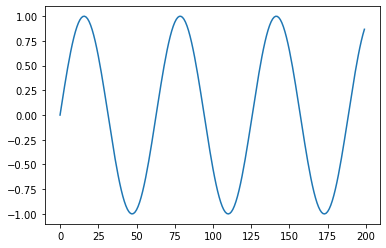

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894   0.0168139   0.1165492   0.21511999
  0.31154136  0.40484992  0.49411335  0.57843976  0.6569866   0.72896904
  0.79366786  0.85043662  0.8987081   0.93799998  0.96791967  0.98816823
  0.99854335  0.99894134  0.98935825  0.96988981  0

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

series = np.sin(0.1 * np.arange(200))
plt.plot(series)
plt.show()
print(series)
T = 10
X = []
Y = []
for t in range(len(series) - T):
  print(t)
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(Y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape ", X.shape, "Y.shape", Y.shape)

In [ ]:
model3.save_weights('base_tour_1.h5')


In [ ]:
model4= model3



In [ ]:
model1.save_weights('final_BAseline_tour.h5')
from google.colab import files
files.download('final_BAseline_tour.h5')

In [ ]:
import numpy
from collections import Counter

def classification_report(y_true, y_pred, labels):
	'''Similar to the one in sklearn.metrics,
	reports per classs recall, precision and F1 score'''
	# print(y_pred)
	# print(y_true)
	y_true = numpy.asarray(y_true).ravel()
	y_pred = numpy.asarray(y_pred).ravel()
	corrects = Counter(yt for yt, yp in zip(y_true, y_pred) if yt == yp)
	y_true_counts = Counter(y_true)
	y_pred_counts = Counter(y_pred)
	report = ((lab,  # label
			   corrects[i] / max(1, y_true_counts[i]),  # recall
			   corrects[i] / max(1, y_pred_counts[i]),  # precision
			   y_true_counts[i]  # support
			   ) for i, lab in enumerate(labels))
	report = [(l, r, p, 2 * r * p / max(1e-9, r + p), s) for l, r, p, s in report]

	print('{:<15}{:>10}{:>10}{:>10}{:>10}\n'.format('',
													'recall',
													'precision',
													'f1-score',
													'support'))
	formatter = '{:<15}{:>10.4f}{:>10.4f}{:>10.4f}{:>10d}'.format
	for r in report:
		print(formatter(*r))
	print('')
	report2 = list(zip(*[(r * s, p * s, f1 * s) for l, r, p, f1, s in report]))
	N = len(y_true)
	print(formatter('avg / total',
					sum(report2[0]) / N,
					sum(report2[1]) / N,
					sum(report2[2]) / N, N) + '\n')
	actual = Counter(y_true)
	del actual[-1]
	accuracy = sum(corrects.values()) / sum(actual.values())
	print('Accuracy:', accuracy)


In [ ]:
print(model1.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))

In [ ]:
print(len(label_final_index))
print(model1.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model1.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis])



y_pred=y_pre.argmax(-1)
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),y_pred,label_final_index)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit([train_padded_word_sequences_dis,train_padded_charword_sequences_dis,s0,c0],
       train_padded_label_sequence_one_hot_dis,validation_split=0.3,epochs=110,batch_size=32,callbacks=[es])

In [ ]:
model1.save_weights('mocha_cd_600.h5')
# from google.colab import files
# files.download('final_explo_crossdomain_mocha_dis.h5')

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model1 = CrossDomainChunk({},{},word_index,54)


**Cross Domain With Soft Attention**

In [ ]:
def CrossDomain(word_to_vec_map, word_to_vec_map1, word_to_index,num_of_label):
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)

  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  print(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Dropout(rate=0.5)(X)

  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  print(X.shape)
  X = (SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
					  kernel_regularizer=keras.regularizers.l2(1e-4),
					  bias_regularizer=keras.regularizers.l1(1e-4),
					  attention_regularizer_weight=1e-4,
					  name='Attention'))(X)
  
  
  
  print(X.shape)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X.shape)
  X = Dropout(rate=0.5)(X)
  # crf1 = CRF(40,sparse_target=False, name='crf1'
  # X= Dense(num_of_label,activation='softmax')(X)

  crf = CRF(num_of_label,sparse_target=False, name='crf')

  X=(crf)(X)
  outputs=X
  

  model = Model(inputs=[sentence_indices,sentence_word],outputs=X)
  return model

In [ ]:
nknj

# ***CROSS_DOMAIN SELF_ATTn PART 1***

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy

opt = Adam(lr=0.004, beta_1=0.9, beta_2=0.999, decay=0.01)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_new = CrossDomain({},{},word_index,54)
model_new.compile(optimizer=opt, loss=crf_loss, metrics=[crf_accuracy,crf_viterbi_accuracy])








In [ ]:
 model_new.fit([train_padded_word_sequences_tour,train_padded_charword_sequences_tour],train_padded_label_sequence_one_hot_tour ,validation_split=0.3,epochs=110,batch_size=32,callbacks=[es])



# print(model_new.evaluate([test_padded_word_sequences_dis,test_padded_charword_sequences_dis],test_padded_label_sequence_one_hot_dis,verbose=1))



In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model_temp=model_new

In [ ]:

history = model_new.fit([train_padded_word_sequences_dis,train_padded_charword_sequences_dis],
       train_padded_label_sequence_one_hot_dis,validation_split=0.3,epochs=30,batch_size=32,callbacks=[es])


In [ ]:
model_new.save_weights('self_dis.h5')



In [ ]:
print(len(label_final_index))
# print(model_new.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model_new.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis])



y_pred=y_pre.argmax(-1)
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),y_pred,label_final_index)

In [ ]:
import pandas as pd
from numpy import asarray
predictions =asarray(y_pred)
print(predictions[0])
prediction = pd.DataFrame(prediction).to_csv('prediction_model_self_dis.csv')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
history = model2.fit([train_padded_word_sequences_dis,train_padded_charword_sequences_dis,s0,c0],
       train_padded_label_sequence_one_hot_dis,validation_split=0.3,epochs=110,batch_size=32,callbacks=[es])

In [ ]:
model2.save_weights('final_explo_crossdomain_self_dis_only.h5')
from google.colab import files
files.download('final_explo_crossdomain_self_dis_only.h5')



In [ ]:
import json


with open('myfile.json', 'w') as file:

    json.dump(history.history, file)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model2 = CrossDomain({},{},word_index,54)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
model2.compile(optimizer=opt, loss=crf_loss, metrics=[crf_viterbi_accuracy,'accuracy',precision_m,recall_m,f1_m]) 
modelfor_cd_prediction = model2.load_weights("/content/drive/My Drive/Colab Notebooks/Exploratory Report/Explo/dis_postagging_with_tl_softattenti.h5")

test_label_predixt=model2.predict([padded_word_sequences_dis[900:],padded_charword_sequences_dis[900:],s0,c0])

## training on tour data and saving weights to perform transfer learining

# **Execution for Cross Domain With Monotonic ChunkWise Attention PART 2** 

In [ ]:
history = model1.fit([padded_word_sequences_tour,padded_charword_sequences_tour,s0,c0],padded_label_sequence_tour_final_one_hot,validation_split=0.3,epochs=10,batch_size=32,callbacks=[es])


In [ ]:
model2.save_weights("dis_postagging_with_tl_softattenti.h5")

**Execution for Cross Domain with Soft Attention**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.download("/content/dis_postagging_with_tl_softattenti.h5")

In [ ]:
acc = history.history['crf_viterbi_accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel("no of epochs")
plt.ylabel("train accuracy and validation accuracy")
plt.legend(["train acc","validation acc"],loc='upper left')
plt.title("accuray vs validation accuracy without transfer learning on tour postagging data ")
plt.savefig("tour_with_tl_chunk_acc_cross_task.png")
plt.show()
files.download("tour_with_tl_chunk_acc_cross_task.png")

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("no of epochs")
plt.ylabel("train loss and validation loss")
plt.legend(["train loss","validation loss"],loc='upper left')
plt.title("train loss vs validation loss without transfer learning on tour postagging data ")
plt.savefig("tour_with_tl_chunk_acc_cross_task_loss.png")
plt.show()

In [ ]:
# files.download("tour_with_tl_chunk_acc_cross_task_loss.png")
m = padded_label_sequence_tour_final_one_hot.shape[0]
s0 = np.zeros((m,128))
c0 = np.zeros((m,128))

# CROSS DOMAIN TL WITH SELF ATTN PART ***2***###

In [ ]:

history = model2.fit([padded_word_sequences_tour,padded_charword_sequences_tour,s0,c0],
          padded_label_sequence_tour_final_one_hot,validation_split=0.2,epochs=100,batch_size=32)


In [ ]:
model.save_weights('tour_postagging_final_tl.h5')

In [ ]:
files.download('/content/tour_postagging_final_tl.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel("no of epochs")
plt.ylabel("train accuracy and validation accuracy")
plt.legend(["train acc","validation acc"],loc='upper right')
plt.title("accuray vs validation accuracy for transfer learning on tour postagging data ")
plt.savefig("tour_for_tl_acc.png")
plt.show()
files.download("/content/tour_for_tl_acc.png")

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("no of epochs")
plt.ylabel("train loss and validation loss")
plt.legend(["train loss","validation loss"],loc='upper right')
plt.title("train loss vs validation loss for transfer learning on tour postagging data ")
plt.savefig("tour_for_tl_loss.png")
plt.show()
files.download('/content/tour_for_tl_loss.png')

# ** ******Cross Task Transfer Learning With Soft Attention**

In [ ]:
def CrossTask(word_to_vec_map,word_to_vec_map1, word_to_index):
  
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)
  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)
  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  



  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  # chunk

  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X1 = Dropout(rate=0.5)(X1)
  X1 = (SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
					  kernel_regularizer=keras.regularizers.l2(1e-4),
					  bias_regularizer=keras.regularizers.l1(1e-4),
					  attention_regularizer_weight=1e-4,
					  name='Attention1'))(X1)
  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X1)
  X1 = Dropout(rate=0.5)(X1)     
       
  
  
  crf1 = CRF(40,sparse_target=False, name='crf_pos')
  # X1= Dense(40,activation='softmax')(X1)
  X1=crf1(X1)
  outputs1=(X1)

  # pos
  
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X2 = Dropout(rate=0.5)(X2)
  X2 = (SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
					  kernel_regularizer=keras.regularizers.l2(1e-4),
					  bias_regularizer=keras.regularizers.l1(1e-4),
					  attention_regularizer_weight=1e-4,
					  name='Attention2'))(X2)
  
  
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X2)
  X2 = Dropout(rate=0.5)(X2)     
       
  
  
  crf2 = CRF(26,sparse_target=False, name='crf_chunk')
  X2=crf2(X2)
  outputs2=(X2)
  model = Model(inputs=[sentence_indices,sentence_word],outputs=[outputs1,outputs2])
  return model

In [ ]:
def CrossTask_softmax(word_to_vec_map,word_to_vec_map1, word_to_index):
  
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)
  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)
  print(char_feat_tensor.shape)
  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])

  



  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  # chunk

  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X1 = Dropout(rate=0.5)(X1)
  X1 = (SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
					  kernel_regularizer=keras.regularizers.l2(1e-4),
					  bias_regularizer=keras.regularizers.l1(1e-4),
					  attention_regularizer_weight=1e-4,
					  name='Attention1'))(X1)
  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X1)
  X1 = Dropout(rate=0.5)(X1)     
       
  
  
  # crf1 = CRF(40,sparse_target=False, name='crf_pos')
  X1= Dense(40,activation='softmax',name='pos')(X1)
  # X1=crf1(X1)
  outputs1=(X1)

  # pos
  
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X2 = Dropout(rate=0.5)(X2)
  X2 = (SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
					  kernel_regularizer=keras.regularizers.l2(1e-4),
					  bias_regularizer=keras.regularizers.l1(1e-4),
					  attention_regularizer_weight=1e-4,
					  name='Attention2'))(X2)
  
  
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X2)
  X2 = Dropout(rate=0.5)(X2)    
  X2= Dense(26,activation='softmax',name='chunk')(X2) 
       
  
  
  # crf2 = CRF(26,sparse_target=False, name='crf_chunk')
  # X2=crf2(X2)
  outputs2=(X2)
  model = Model(inputs=[sentence_indices,sentence_word],outputs=[outputs1,outputs2])
  return model

cross task crf

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model3 = CrossTask({},{},word_index)
model3.compile(optimizer=opt, loss=crf_loss, metrics=[crf_accuracy]) 

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_accuracy



opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model3 = CrossTask({},{},word_index)
model3.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy']) 

In [ ]:
model3.summary()

**Cross Task With Monotonic Chunk Wise Attention**

In [ ]:
def CrossTaskChunk(word_to_vec_map,word_to_vec_map1, word_to_index):
  
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)
  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)  
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  
  print(char_feat_tensor.shape)
  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])



  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X = Dropout(rate=0.5)(X)

  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X1.shape)
  X1 = Dropout(rate=0.5)(X1)
  print(X1.shape)
  chunk_list1 = Lambda(lambda x : efficient_chunkwise_attention(8,0.6,x))(X1)
  print(chunk_list1.shape)
  # X = efficient_chunkwise_attention(6,0.6,chunk_list)
  # print(X.shape)
  X1 = Bidirectional(GRU(units=128,return_sequences=True))(chunk_list1)
  X1 = Dropout(rate=0.5)(X1)     
       
  
  
  crf1 = CRF(40,sparse_target=False, name='crf_chunk')
  # X1= Dense(40,activation='softmax')(X1)
  X1=crf1(X1)
  outputs1=X1

  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X)
  print(X2.shape)
  X2 = Dropout(rate=0.5)(X2)
  print(X2.shape)
  chunk_list2 = Lambda(lambda x : efficient_chunkwise_attention(8,0.6,x))(X2)
  print(chunk_list2.shape)
  # X = efficient_chunkwise_attention(6,0.6,chunk_list)
  # print(X.shape)
  
  
  # outputs2=(crf2)(chunk_list2)
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(chunk_list2)
  X2 = Dropout(rate=0.5)(X2)     
       
  
  
  # crf1 = CRF(40,sparse_target=False, name='crf1'
  # X2= Dense(26,activation='softmax')(X2)
  crf2 = CRF(26,sparse_target=False, name='crf_pos')
  X2= crf2(X2)

  outputs2=X2
  model = Model(inputs=[sentence_indices,sentence_word],outputs=[outputs1,outputs2])
  return model

In [ ]:
def CrossTask_base(word_to_vec_map,word_to_vec_map1, word_to_index):
  
  input_shape = (52,)
  input_shape1 = (52,CHAR_MAX_LENGTH)

  sentence_indices = Input(shape=input_shape,dtype='int32')
  embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_vec_map1 ,word_to_index)
  embeddings = embedding_layer(sentence_indices)

  sentence_word = Input(shape=input_shape1)
  char_feat = []
  for t in range(52):
    sentence_word_x = Lambda(lambda x : x[:,t,:])(sentence_word)
#    sentence_word_x = Reshape((1,))(sentence_word_x)
    char_feat.append(charcnn(char_index,sentence_word_x))
  print(len(char_feat))
  print(char_feat[0].shape)
  print(embeddings.shape)
  char_feat_tensor = Lambda(lambda x : keras.backend.stack(x,axis=1))(char_feat)  
  print(char_feat_tensor.shape)
  
  mixed_embeddings = Concatenate()([embeddings,char_feat_tensor])



  X = Bidirectional(GRU(units=128,return_sequences=True))(mixed_embeddings)
  X = Bidirectional(GRU(units=128,return_sequences=True))(X)
  X1 = Dropout(rate=0.5)(X)
  X1 = Bidirectional(GRU(units=128,return_sequences=True))(X1)
  X1 = Dropout(rate=0.5)(X1)
  X1 = Dense(units=40)(X1)
  X1 = Activation('softmax')(X1)
  X2 = Dropout(rate=0.5)(X)
  X2 = Bidirectional(GRU(units=128,return_sequences=True))(X2)
  X2 = Dropout(rate=0.5)(X2)
  X2 = Dense(units=26)(X2)
  X2 = Activation('softmax')(X2)
  model = Model(inputs=[sentence_indices,sentence_word],outputs=[X1,X2])
  return model

In [ ]:
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model4 = CrossTaskChunk({},{},word_index)
model4.compile(optimizer=opt, loss=crf_loss, metrics=[crf_accuracy]) 
# model4.compile(optimizer=opt, loss=crf_loss, metrics=[crf_viterbi_accuracy,'accuracy']) 
print(model4.summary())


In [ ]:
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model4 = CrossTask_base({},{},word_index)
model4.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy']) 
# model4.compile(optimizer=opt, loss=crf_loss, metrics=[crf_viterbi_accuracy,'accuracy']) 
print(model4.summary())


In [ ]:
chunk_tokenizer = Tokenizer()
chunk_tokenizer.fit_on_texts(chunk_label_dis)
chunk_label_index = chunk_tokenizer.word_index
chunk_label_sequences = chunk_tokenizer.texts_to_sequences(chunk_label_dis)
chunk_label_sequence = pad_sequences(chunk_label_sequences,padding="post",maxlen=52,truncating="post")
print(chunk_label_sequence)

In [ ]:
chunk_tokenizer_tour = Tokenizer()
chunk_tokenizer_tour.fit_on_texts(chunk_label_tour)
chunk_label_index_tour = chunk_tokenizer_tour.word_index
chunk_label_sequences_tour = chunk_tokenizer_tour.texts_to_sequences(chunk_label_tour)
chunk_label_sequence_tour = pad_sequences(chunk_label_sequences_tour,padding="post",maxlen=52,truncating="post")
print(chunk_label_sequence)

In [ ]:
print(len(chunk_label_index))
print(chunk_label_sequence_tour.shape)

In [ ]:
chunk_label_sequence_onehot = np.zeros(chunk_label_sequence.shape+(len(chunk_label_index)+1,))
print(chunk_label_sequence_onehot.shape)
for i in range(chunk_label_sequence.shape[0]):
  for j in range(chunk_label_sequence.shape[1]):
    k = chunk_label_sequence[i,j]
    chunk_label_sequence_onehot[i,j,k] = 1
print(chunk_label_sequence_onehot.shape)

In [ ]:
chunk_label_sequence_onehot = np.zeros(chunk_label_sequence.shape+(len(chunk_label_index)+1,))
print(chunk_label_sequence_onehot.shape)
for i in range(chunk_label_sequence.shape[0]):
  for j in range(chunk_label_sequence.shape[1]):
    k = chunk_label_sequence[i,j]
    chunk_label_sequence_onehot[i,j,k] = 1
print(chunk_label_sequence_onehot.shape)

In [ ]:
padded_label_sequence_one_hot_dis_2 = one_hotencoding(padded_label_sequence,label_index)
padded_label_sequence_one_hot_tour_2=one_hotencoding(padded_label_sequence_tour,label_index1)
print(chunk_label_sequence_tour.shape)
chunk_label_sequence_one_hot_tour= one_hotencoding(chunk_label_sequence_tour,chunk_label_index_tour)
print(padded_label_sequence_one_hot_tour_2.shape)

In [ ]:
train_chunk_dis= padded_label_sequence_one_hot_dis_2[:900]
test_chunk_dis= padded_label_sequence_one_hot_dis_2[900:]

print(train_chunk_dis.shape,test_chunk_dis.shape)

# ***CROSS-TASK SELF ATTENTION***

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model3.fit([train_padded_word_sequences_dis,train_padded_charword_sequences_dis],
          [train_padded_label_sequence_one_hot_dis,train_chunk_dis],validation_split=0.2,epochs=120,batch_size=32,callbacks=[es])

# ***CROSS-TASK MONOTONIC CHUNKWISE ATTENTION ATTENTION***

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model3.fit([padded_word_sequences_dis[:1000],padded_charword_sequences_dis[:1000]],
          [padded_label_sequence_one_hot_dis_2[:1000],chunk_label_sequence_onehot[:1000]],validation_split=0.2,epochs=150,batch_size=32,callbacks=[es])

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model3.fit([padded_word_sequences_tour[:2400],padded_charword_sequences_tour[:2400]],
          [padded_label_sequence_one_hot_tour_2[:2400],chunk_label_sequence_one_hot_tour[:2400]],validation_split=0.2,epochs=150,batch_size=32,callbacks=[es])

In [ ]:
model3.evaluate([padded_word_sequences_tour[2400:],padded_charword_sequences_tour[2400:]],
          [padded_label_sequence_one_hot_tour_2[2400:],chunk_label_sequence_one_hot_tour[2400:]],verbose=1)

In [ ]:
classification_report()

In [ ]:
print(len(label_final_index))
y_pre= model4.predict([padded_word_sequences_tour[2400:],padded_charword_sequences_tour[2400:]])
print(y_pre[0])
print(y_pre[1].shape,test_padded_label_sequence_one_hot_dis.shape)
classification_report(padded_label_sequence_one_hot_tour_2[2400:].argmax(-1),y_pre[0].argmax(-1),label_index1)


In [ ]:
model4.save_weights("cross_task_base_dis.h5")


In [ ]:
from google.colab import files
files.download("cross_task_base_dis.h5")

In [ ]:
print(history.history.keys())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['crf1_crf_viterbi_accuracy']
val_acc = history.history['val_crf1_accuracy']
loss = history.history['crf2_loss']
val_loss = history.history['val_crf2_loss']
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel("no of epochs")
plt.ylabel("train accuracy vs validation accuracy cross task transfer learning")
plt.legend(['train_acc','val_acc'],loc='upper right')
plt.savefig('dis_after_chunk_cttl_acc_self.png')
plt.show()
files.download("/content/dis_after_chunk_cttl_acc_self.png")

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("no of epochs")
plt.ylabel("train loss vs validation loss")
plt.legend(["train_loss","validation_loss"],loc="upper right")
plt.title("loss vs validation loss after chunk cross task transfer learning")
plt.savefig("dis_after_chunk_cttl_loss_self.png")
files.download("/content/dis_after_chunk_cttl_loss_self.png")

In [ ]:
word1_f = open('/content/drive/My Drive/hi.vec','r').readlines()
print((word1_f[1000]))
embeddings_index = {}
k = 302
i=1
j=1
for line in word1_f:
    values = line.split(" ")
    word = values[0]
   word2_f = open('/content/drive/My Drive/hi/hi.tsv')
embeddings2_index = {}
import csv

with open('/content/drive/My Drive/hi/hi.tsv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
    print(len(row[0]))

    coefs = np.asarray((values[1:]),dtype="float32")
    embeddings_index[word] = coefs
    i=i+1
    j=k
EMBEDDING_DIM=301
print(embeddings_index['के'])
print('Found %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        if embedding_vector !=0:
          embedding_matrix[i] = (embedding_vector)



word2_f = open('/content/drive/My Drive/hi/hi.tsv')
embeddings2_index = {}
import csv

with open('/content/drive/My Drive/hi/hi.tsv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
    print(len(row[0]))



In [ ]:
from keras.models import load_model
import numpy as np
import pandas as pd

from numpy import asarray
from numpy import savetxt
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('data.csv', data, delimiter=',')

# Baseline ***tour***

In [ ]:

model_base_tour= model1.load_weights('/content/final_BAseline_tour.h5')

print(len(label_final_index))
print(model1.evaluate([test_padded_word_sequences_tour ,test_padded_charword_sequences_tour,s0_tour_test,c0_tour_test],test_padded_label_sequence_one_hot_tour,verbose=1))
y_pre= model1.predict([test_padded_word_sequences_tour ,test_padded_charword_sequences_tour,s0_tour_test,c0_tour_test])
y_pred=y_pre.argmax(-1)
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(predictions).to_csv('prediction_model_base_tour.csv')


classification_report(test_padded_label_sequence_one_hot_tour.argmax(-1),y_pred,label_final_index)


# Baseline ***Dis***

In [ ]:
model_base_dis= model3.load_weights('/content/drive/My Drive/final exolo/Baseline_dis1.h5')

print(len(label_final_index))
print(model3.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model3.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test])



y_pred=y_pre.argmax(-1)
Base_disease=y_pred
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(prediction).to_csv('prediction_base_dis.csv')
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),y_pre.argmax(-1),label_final_index)


CrossDomain DIS

In [ ]:
model_crossDomain_dis=model2.load_weights('/content/drive/My Drive/final exolo/crossDomain_Base_dis.h5')

print(len(label_final_index))
print(model2.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model2.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test])



y_pred=y_pre.argmax(-1)
cd_base_disease=y_pred
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(prediction).to_csv('prediction_model_cross_domain_base_dis.csv')
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),y_pred,label_final_index)


CrossTask DIs

In [ ]:
model_crossTask_dis=model_new.load_weights('/content/cross_task_base_dis.h5')

print(model_new.evaluate([padded_word_sequences_dis[900:],padded_charword_sequences_dis[900:]],
          [padded_label_sequence_one_hot_dis_2[900:],chunk_label_sequence_onehot[900:]],verbose=1))
y_pre= model.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis])

y_pred=y_pre[0].argmax(-1)
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(predictions).to_csv('prediction_model_cross_Task_base_dis.csv')

classification_report(padded_label_sequence_one_hot_dis_2[900:].argmax(-1),y_pred,label_index)


CrossDomain Self crf dis

In [ ]:
model_crossDomain_soft_dis=model_new.load_weights('/content/drive/My Drive/final exolo/final_explo_crossdomain_self_dis_main (1).h5')

print(len(label_final_index))
print(model_new.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model_new.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test])



cd_self_disease=y_pre.argmax(-1)


classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),cd_self_disease,label_final_index)


cross Domain mocha crf dis

In [ ]:
model_crossDomain_Mocha_dis=model1.load_weights('/content/drive/My Drive/final exolo/final_explo_crossdomain_mocha_dis_extra1.h5')
print(len(label_final_index))
print(model1.evaluate([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test],test_padded_label_sequence_one_hot_dis,verbose=1))
y_pre= model1.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis,s0_test,c0_test])



y_pred=y_pre.argmax(-1)
cd_mocha_disease=y_pred
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(prediction).to_csv('prediction_model_mocha_dis.csv')

print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(test_padded_label_sequence_one_hot_dis.argmax(-1),y_pred,label_final_index)


Cross Task Soft Dis

In [ ]:
model_crossTask_soft_dis=model3.load_weights('/content/drive/My Drive/final exolo/Crosstask_soft_dis.h5')

print(len(label_final_index))
print(len(label_final_index))
print(model3.evaluate([padded_word_sequences_dis[900:],padded_charword_sequences_dis[900:]],
          [padded_label_sequence_one_hot_dis_2[900:],chunk_label_sequence_onehot[900:]],verbose=1))
y_pre= model3.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis])




y_pred=y_pre[0].argmax(-1)
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(predictions).to_csv('prediction_model_self_dis_ct.csv')
y_pred=y_pre[1].argmax(-1)
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(chunk_label_sequence_onehot[900:].argmax(-1),y_pred,label_index1)


Cross Task Mocha Dis

In [ ]:
model_crossDomain_Mocha_dis=model4.load_weights('/content/drive/My Drive/final exolo/final_mocha_crosstask_dis_extra.h5')

print(len(label_final_index))
print(model4.evaluate([padded_word_sequences_dis[900:],padded_charword_sequences_dis[900:]],
          [padded_label_sequence_one_hot_dis_2[900:],chunk_label_sequence_onehot[900:]],verbose=1))
y_pre= model4.predict([test_padded_word_sequences_dis ,test_padded_charword_sequences_dis])



y_pred=y_pre[0].argmax(-1)
prediction =asarray(y_pred)
print(prediction[0])
prediction = pd.DataFrame(predictions).to_csv('prediction_model_mocha_dis_ct.csv')
print(y_pred[0],test_padded_label_sequence_one_hot_dis[0].argmax(-1))
print(y_pre[0][0])

classification_report(padded_label_sequence_one_hot_dis_2[900:].argmax(-1),y_pred,label_index)


In [ ]:
import numpy
from collections import Counter
import numpy
from collections import Counter

def classification_report_org(y_true, y_pred, labels):
	'''Similar to the one in sklearn.metrics,
	reports per classs recall, precision and F1 score'''
	# print(y_pred)
	# print(y_true)
	y_true = numpy.asarray(y_true).ravel()
	y_pred = numpy.asarray(y_pred).ravel()

	corrects = Counter(yt for yt, yp in zip(y_true, y_pred) if yt == yp)
	y_true_counts = Counter(y_true)
	y_pred_counts = Counter(y_pred)
	report = ((lab,  # label
			   corrects[i] / max(1, y_true_counts[i]),  # recall
			   corrects[i] / max(1, y_pred_counts[i]),  # precision
			   y_true_counts[i]  # support
			   ) for i, lab in enumerate(labels))
	report = [(l, r, p, 2 * r * p / max(1e-9, r + p), s) for l, r, p, s in report]

	print('{:<15}{:>10}{:>10}{:>10}{:>10}\n'.format('',
													'recall',
													'precision',
													'f1-score',
													'support'))
	formatter = '{:<15}{:>10.2f}{:>10.2f}{:>10.2f}{:>10d}'.format
	for r in report:
		print(formatter(*r))
	print('')
	report2 = list(zip(*[(r * s, p * s, f1 * s) for l, r, p, f1, s in report]))
	N = len(y_true)
	print(formatter('avg / total',
					sum(report2[0]) / N,
					sum(report2[1]) / N,
					sum(report2[2]) / N, N) + '\n')
	actual = Counter(y_true)
	del actual[-1]
	accuracy = sum(corrects.values()) / sum(actual.values())
	print('Accuracy:', accuracy)


def classification_report_1(y_true, y_pred, labels):
    '''Similar to the one in sklearn.metrics,
    reports per classs recall, precision and F1 score'''
    # print(y_pred)
    # print(y_true)
    y_true = numpy.asarray(y_true).ravel()
    y_pred = numpy.asarray(y_pred).ravel()
    corrects = Counter(yt for yt, yp in zip(y_true, y_pred) if yt == yp)
    incorrects = Counter(yt for yt, yp in zip(y_true, y_pred) if yt != yp )
  
  
    y_true_counts = Counter(y_true)
    y_pred_counts = Counter(y_pred)
    report = ((lab,  # label
               corrects[i] / max(1, y_true_counts[i]),  # recall
               corrects[i] / max(1, y_pred_counts[i]),  # precision
               y_true_counts[i],corrects[i],incorrects[i]) for i, lab in enumerate(labels))
    report_analysis=[(l,cor,incor,total) for l, rec, pre, total, cor, incor in report]
    report = [(l, r, p, 2 * r * p / max(1e-9, r + p), s) for l, r, p, s in report]

    # print('{:<15}{:>10}{:>10}{:>10}{:>10}\n'.format('',
    #                                                 'recall',
    #                                                 'precision',
    #                                                 'f1-score',
    #                                                 'support'))
    # formatter = '{:<15}{:>10.2f}{:>10.2f}{:>10.2f}{:>10d}'.format
    # for r in report:
    #     print(formatter(*r))
    # print('')
    # report2 = list(zip(*[(r * s, p * s, f1 * s) for l, r, p, f1, s in report]))
    # N = len(y_true)
    # print(formatter('avg / total',
    #                 sum(report2[0]) / N,
    #                 sum(report2[1]) / N,
    #                 sum(report2[2]) / N, N) + '\n')
    # actual = Counter(y_true)
    # del actual[-1]
    # accuracy = sum(corrects.values()) / sum(actual.values())
    # print('Accuracy:', accuracy)

    
    print('label  true_pos  false_pos   Total')
    total=[]
    label=[]
    correct=[]
    incorrect=[]
    error=[]
    for lab,cor,incor,tot in report_analysis:
      # print(lab,"    ",cor,"    ",incor,"     ",tot,"         ",((tot-cor)/tot ))
      label.append(lab)
      correct.append(cor)
      incorrect.append(incor)
      total.append(tot)
      if tot!=0:
        error.append(((tot-cor)/tot ))
      else :
        error.append(0)

    return label,correct,total,error      



In [ ]:
import pandas as pd

In [ ]:
url = '/content/drive/My Drive/final exolo/Prediction_files for 900 to 1494 disease dataset/prediction_base_dis.csv'
Baseline_dis = pd.read_csv(url)

url = '/content/drive/My Drive/final exolo/Prediction_files for 900 to 1494 disease dataset/prediction_cross_domain_dis_base_final.csv'
cd_dis = pd.read_csv(url)

url = '/content/drive/My Drive/final exolo/Prediction_files for 900 to 1494 disease dataset/prediction_model_self_dis_cd.csv'
cd_dis_self = pd.read_csv(url)

url = '/content/drive/My Drive/final exolo/Prediction_files for 900 to 1494 disease dataset/prediction_model_mocha_dis_cd.csv'
cd_dis_mocha = pd.read_csv(url)
print(cd_dis)



url2='/content/drive/My Drive/final exolo/Prediction_files for 900 to 1494 disease dataset/Data pred/Disease_900_to_last_tokenized_label.csv'
true = pd.read_csv(url2)

In [ ]:
from numpy import asarray

In [ ]:

def pre(temp):
  tem=[]
  temp=asarray(temp)
  for i in temp:
    tem.append(i[1:])
  return tem  

baseline_dis= pre(Baseline_dis)
cd_dis= pre(cd_dis)
cd_dis_self=cd_self_disease
cd_dis_mocha= pre(cd_dis_mocha)
true= pre(true)

print(cd_dis_self)

In [ ]:
label,bas_dis,total,er_base = classification_report_1(test_padded_label_sequence_one_hot_dis.argmax(-1),Base_disease,label_final_index)
label,cd_dis_base,total,er_cd = classification_report_1(test_padded_label_sequence_one_hot_dis.argmax(-1),cd_base_disease,label_final_index)
label,cd_dis_self,total,er_cd_self = classification_report_1(test_padded_label_sequence_one_hot_dis.argmax(-1),cd_self_disease,label_final_index)
label,cd_dis_mocha,total,er_cd_mocha = classification_report_1(test_padded_label_sequence_one_hot_dis.argmax(-1),cd_mocha_disease,label_final_index)

# print(len(bas_dis),len(cd_dis_base),len(cd_dis_self),len(cd_dis_mocha))


In [ ]:
data = { 'label': label,'actual_data':total,'Baseline':bas_dis,'Cross_domain_baseline':cd_dis_base,'cross_domain_self':cd_dis_self,'cross_domain_mocha':cd_dis_mocha,'error_base':er_base,'error_cd_base':er_cd,'error_cd_self':er_cd_self,'error_cd_mocha':er_cd_mocha}
columns=['label','Baseline','Cross_domain_baseline','cross_domain_self','cross_domain_mocha']

In [ ]:
from pandas import DataFrame

In [ ]:
plot= DataFrame(data)
plot['error_base']= round(plot['error_base'],4)
plot['error_cd_self']= round(plot['error_cd_self'],4)
plot['error_cd_mocha']= round(plot['error_cd_mocha'],4)
plot['error_cd_base']= round(plot['error_cd_base'],4)

In [ ]:
plot

prediction = pd.DataFrame(plot).to_csv('Analysis_final_final.csv')